## Case study of big mart

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.api as sms
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline


In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# values for eigenvalues and eigenvectors contain 'exponential' terms 
# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# the path for reading the data file
# Note: Set your path accordingly
#os.chdir(r"C:\Users\user\Desktop\Case study\classification")

## Loading the data set

In [3]:
df = pd.read_csv("C:/Users/Dell/Desktop/DSE/Linear Regression/Case Study/Bigmart/train.csv")

In [182]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [183]:
df.shape

(8523, 12)

In [184]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [186]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [187]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [188]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [189]:
(df.Outlet_Type.value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [190]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [191]:
(df.Item_Type.value_counts()/df['Outlet_Type'].count())*100

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

In [192]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

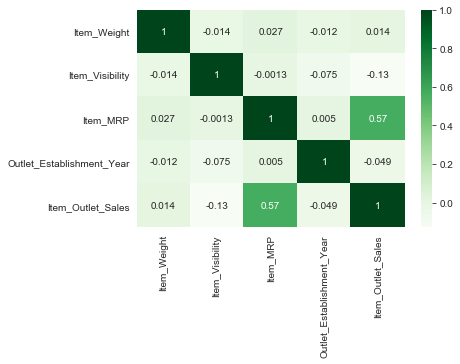

In [193]:
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='Greens')

There is no multicollinearity.

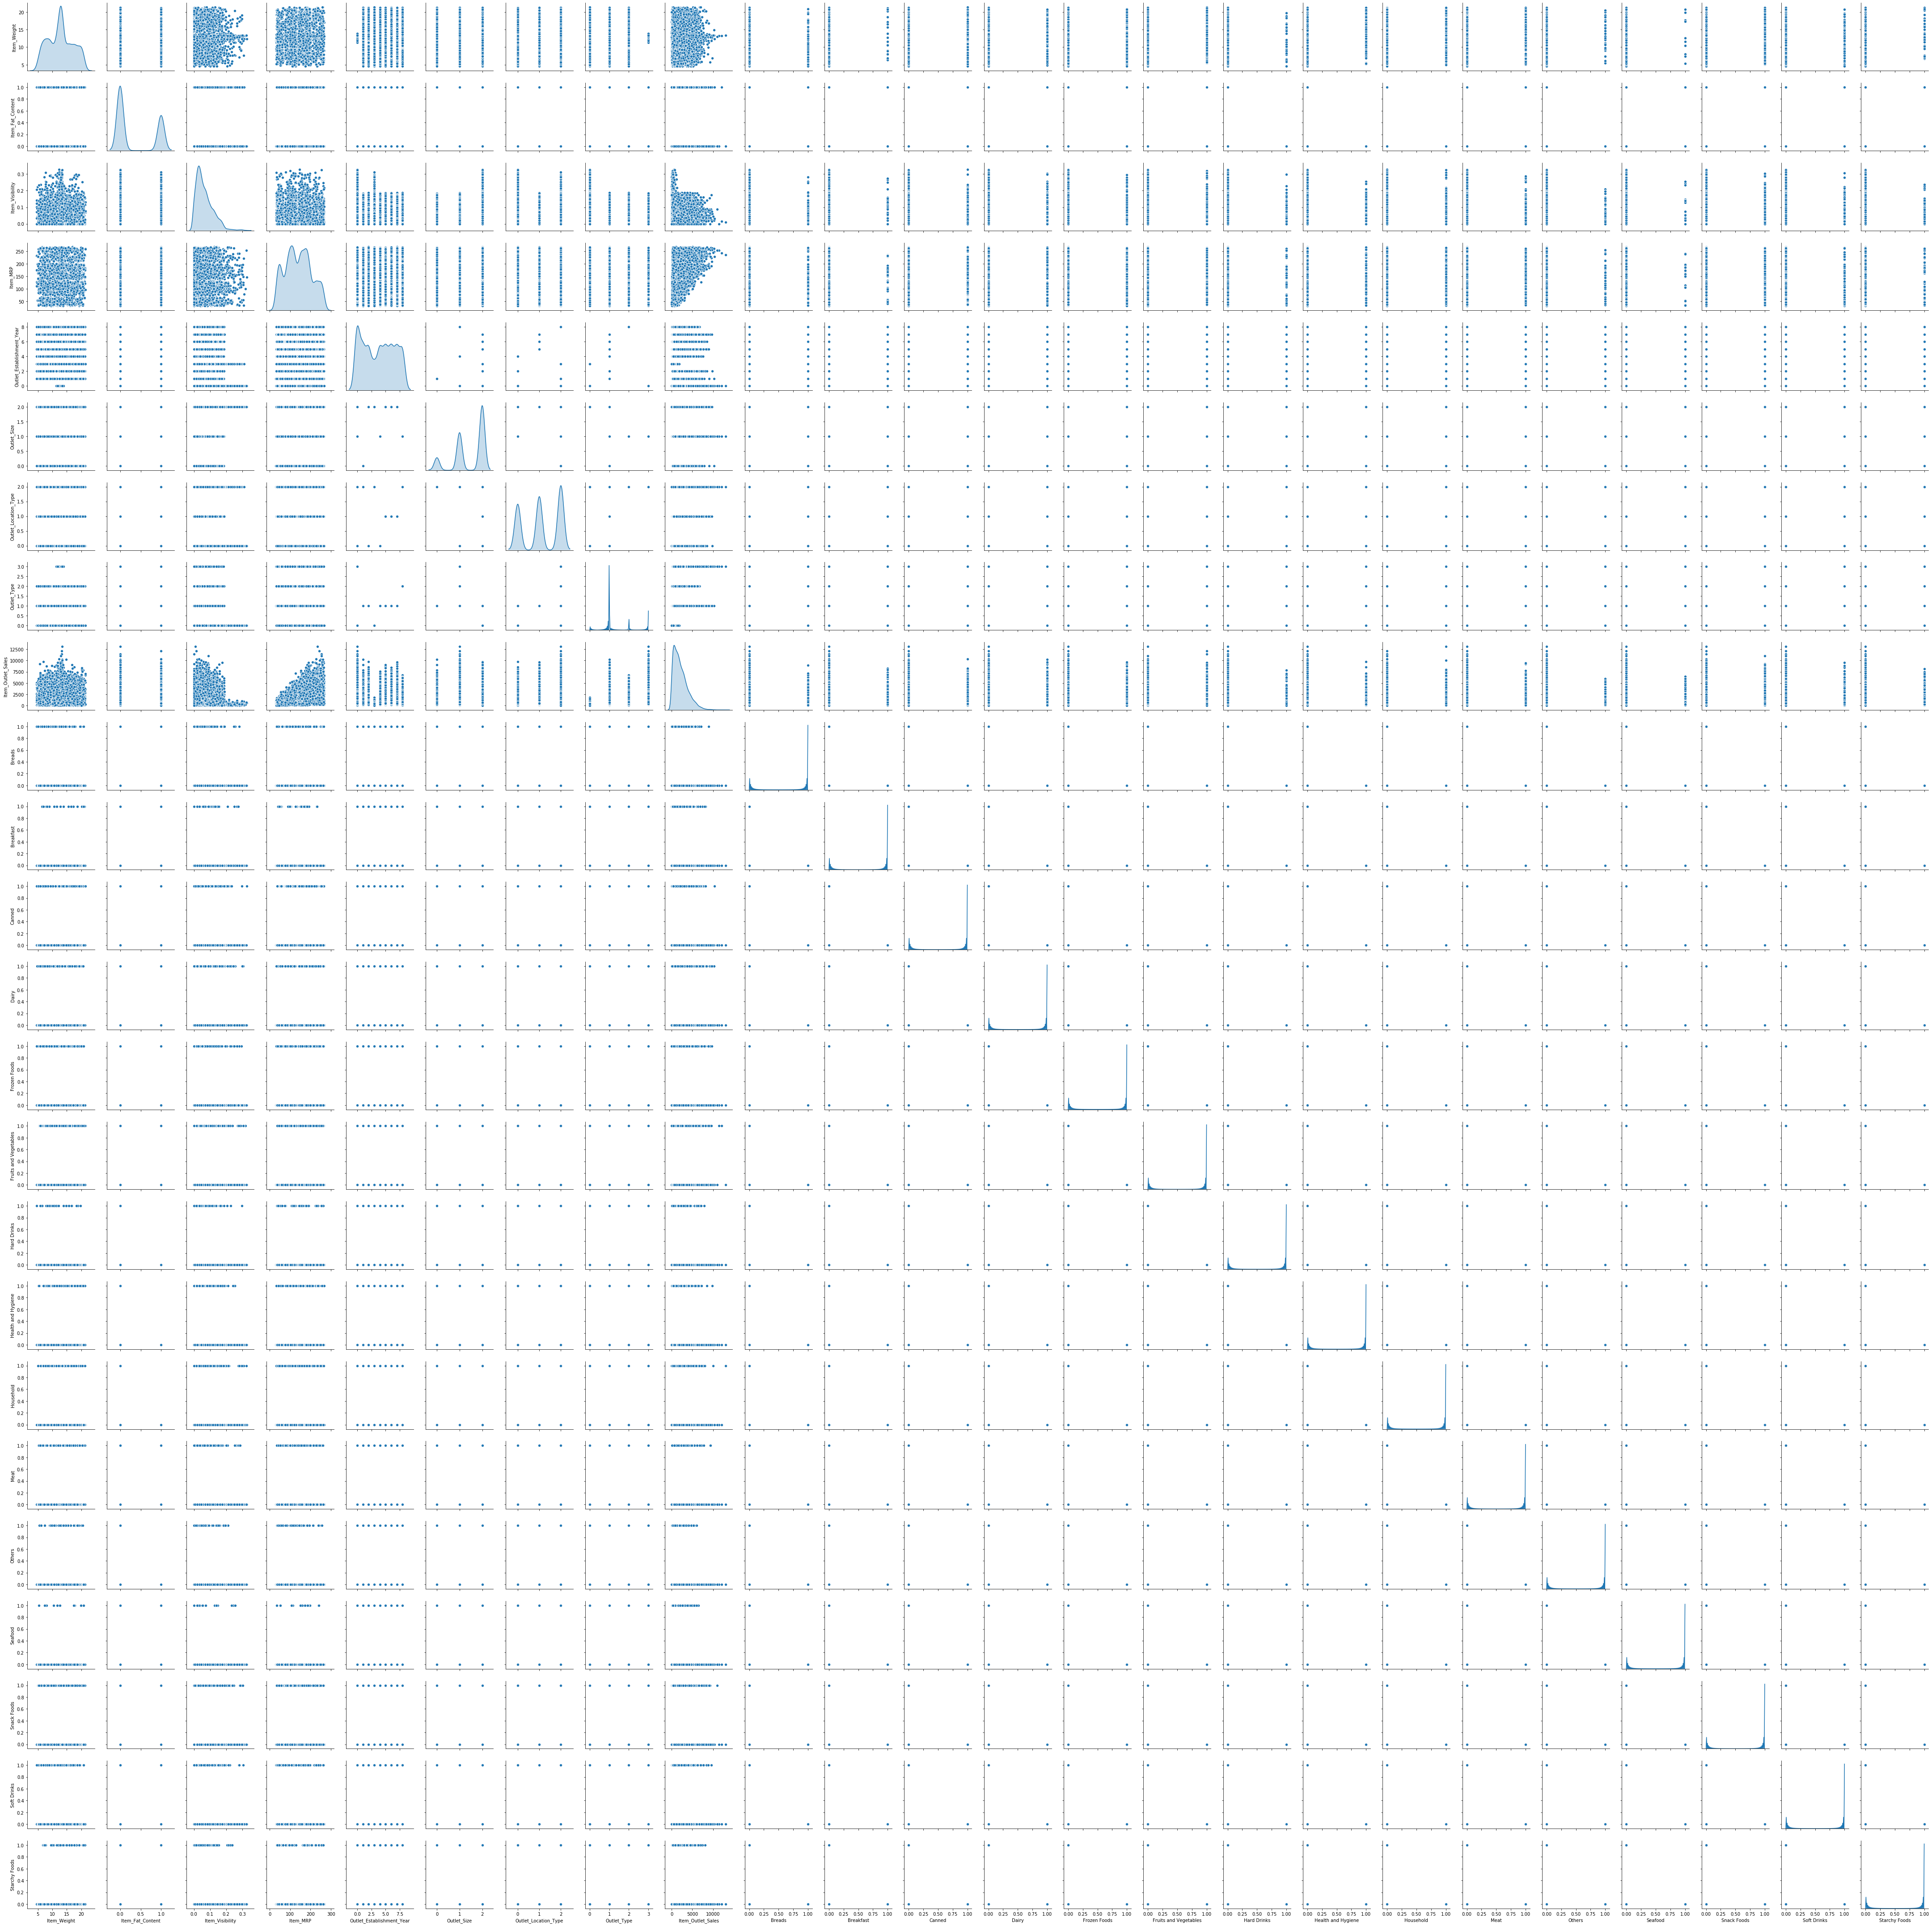

In [17]:
sns.pairplot(df_final,diag_kind='kde')

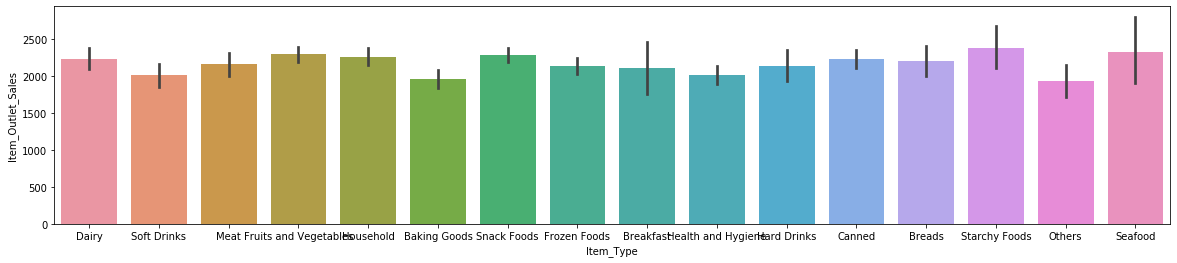

In [139]:
plt.figure(figsize=(20,4))
sns.barplot(df['Item_Type'],y=df['Item_Outlet_Sales'])

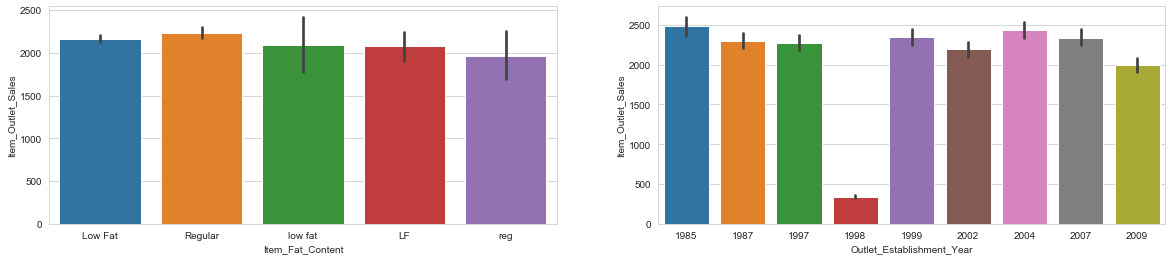

In [121]:
fig,ax = plt.subplots(1,2,figsize=(20,4))
sns.set_style('whitegrid')
sns.barplot(df['Item_Fat_Content'],y=df['Item_Outlet_Sales'],ax=ax[0])
sns.barplot(df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'],ax=ax[1])

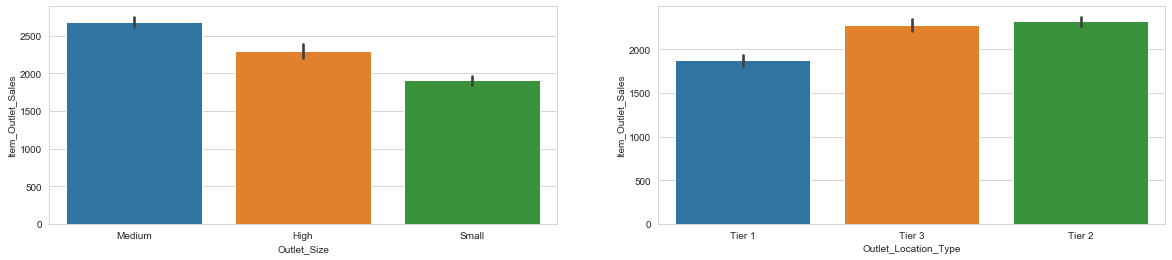

In [120]:
fig,ax = plt.subplots(1,2,figsize=(20,4))
sns.set_style('whitegrid')
sns.barplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'],ax=ax[0])
sns.barplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'],ax=ax[1])

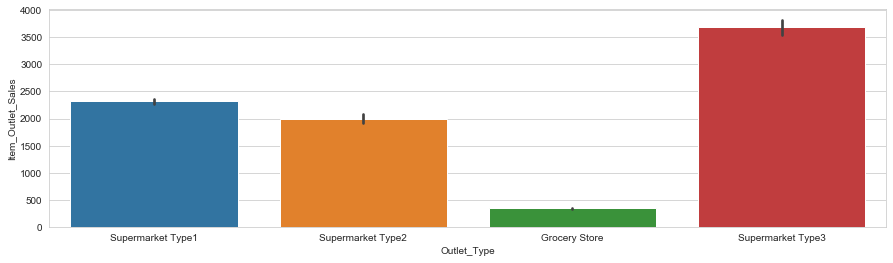

In [124]:
plt.figure(figsize=(15,4))
sns.barplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'],data=df)

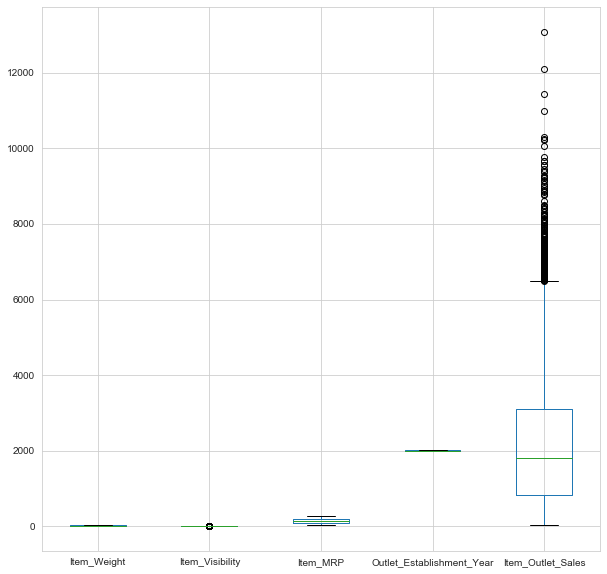

In [25]:
num = df.select_dtypes(include='number')
num.plot(kind='box',figsize=(10,10))

Outliers are present in Item_Visibility and Item_Outlet_Sales. Outliers are not treated as they may high important information.

### Checking for null values

In [194]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Imputing null values in train data

In [4]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [5]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x:x.fillna(x.value_counts().sort_values(ascending=False).index[0]))

In [6]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

In [7]:
# The Item_Type feature is being changed to have three categories instead of 16
def item(x):
    if x in ['Soft Drinks','Hard Drinks']:
        return 'Drinks'
    if x in ['Household','Health and Hygiene','Others']:
        return 'Others'
    else:
        return 'Consumables'

In [8]:
df['item_type'] = df['Item_Type'].apply(item)

In [9]:
df['item_type'].value_counts()

Consumables    6265
Others         1599
Drinks          659
Name: item_type, dtype: int64

In [10]:
# A new feature is created to represent the number of years since the outlet has been opened
df['Years_since_Established'] = 2020 - df['Outlet_Establishment_Year']

### Creating dummy variables for categorical columns in train and test data

In [11]:
df['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace=True)

In [12]:
df1 = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [13]:
df_getdummies = pd.get_dummies(df[['item_type','Outlet_Type']],drop_first=True)

In [14]:
df2 = df1.drop(['item_type','Outlet_Type'],axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
df2[['Item_Fat_Content','Outlet_Location_Type','Outlet_Size']] = df2[['Item_Fat_Content','Outlet_Location_Type','Outlet_Size']].apply(lambda x:encod.fit_transform(x))

In [16]:
df_final = pd.concat([df2,df_getdummies],axis=1)

In [17]:
df_final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_since_Established,item_type_Drinks,item_type_Others,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,732.3800,22,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,1,1,0,0


In [18]:
df_final.shape

(8523, 13)

### Checking assumptions

In [19]:
X = df_final.drop('Item_Outlet_Sales',axis=1)
y = df_final['Item_Outlet_Sales']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [21]:

X_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train,X_constant).fit()
ols_model.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     637.5
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:57:49   Log-Likelihood:                -50340.
No. Observations:                5966   AIC:                         1.007e+05
Df Residuals:                    5953   BIC:                         1.008e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1196.2578    236.256     -5.063      0.000   -1659.406    -733.110
Item_Weight                      -1.6050      3.426     -0.468      0.640      -8.322       5.112
Item_Fat_Content                 32.1690     33.179      0.970      0.332     -32.874      97.212
Item_Visibility                -330.9518    292.944     -1.130      0.259    -905.227     243.324
Item_MRP                         15.3515      0.232     66.077      0.000      14.896      15.807
Outlet_Size                     -88.9613     45.079     -1.973      0.048    -177.333      -0.590
Outlet_Location_Type            -27.5335     26.660     -1.033      0.302     -79.797      24.730
Years_since_Established         -11.8104      4.505     -2.622      0.009     -20.642      -2.979
item_type_Drinks                -27.2692     57.544     -0.474      0.636    -140.077      85.539
item_type_Others                -33.2373     40.450     -0.822      0.411    -112.535      46.060
Outlet_Type_Supermarket Type1  1781.6527     73.688     24.178      0.000    1637.197    1926.109
Outlet_Type_Supermarket Type2  1330.0748    123.196     10.796      0.000    1088.566    1571.583
Outlet_Type_Supermarket Type3  3297.7510     66.982     49.234      0.000    3166.443    3429.059
==============================================================================
Omnibus:                      791.073   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.692
Skew:                           0.738   Prob(JB):                         0.00
Kurtosis:                       5.485   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ols_model_rsquared = ols_model.rsquared
print("OLS Model Rsquare: ",ols_model_rsquared)

OLS Model Rsquare:  0.5623687486791005


In [23]:
ols_model_adj_rsquared = ols_model.rsquared_adj
print("OLS Model Adjusted Rsquared: ",ols_model_adj_rsquared)

OLS Model Adjusted Rsquared:  0.5614865758224146


In [24]:
# Linearity

sm.stats.diagnostic.linear_rainbow(ols_model,frac=0.7)

(1.0438490770985738, 0.139653097631062)

The residuals are linear.

In [25]:
# Homoscedasticity

sms.het_goldfeldquandt(ols_model.resid,ols_model.model.exog)

(0.9643712388125405, 0.8385337560723699, 'increasing')

The residuals are homoscedastic.

In [26]:
# No multicollinearity

vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif},index=X_constant.columns).T

,const,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Years_since_Established,item_type_Drinks,item_type_Others,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
vif,266.032232,1.011782,1.197554,1.09481,1.001731,4.47222,2.258985,6.758244,1.069103,1.20462,5.861281,7.11711,2.070315


### **Linear Regression**

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print("Train Score:",lin_reg.score(X_train,y_train))
print("Test Score :",lin_reg.score(X_test,y_test))

Train Score: 0.5623687486791005
Test Score : 0.5625574335592015


In [29]:
linreg_pred = lin_reg.predict(X_test)

In [30]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,linreg_pred)))

RMSE:  1154.144097127102


In [31]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'Train Accuracy', 'Test Accuracy', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Linear_regression_metrics = pd.Series({'Model': "Linear regression ",
                     'Train Accuracy' : lin_reg.score(X_train,y_train),
                 'Test Accuracy': lin_reg.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,linreg_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Linear_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097


### **Random Forest**

In [32]:
rf = RandomForestRegressor()

In [33]:
rf.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
print("Train score:",rf.score(X_train,y_train))
print("Test Score :",rf.score(X_test,y_test))

Train score: 0.9159522023450284
Test Score : 0.5302902636683596


In [35]:
rf_pred = rf.predict(X_test)

In [36]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

RMSE:  1195.9535038653746


In [37]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Random_Forest_metrics = pd.Series({'Model': "Random Forest",
                     'Train Accuracy' : rf.score(X_train,y_train),
                 'Test Accuracy': rf.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,rf_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Random_Forest_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504


### **Random Forest Grid Search**

In [38]:
params = {
             'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'n_estimators': [100,150,200,250],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
          }

n_folds = 5

grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

grid_search.fit(X,y)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 57.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 77.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 101.3min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 129.6min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 161.7min
[Parallel(n_jobs=-1)]: Done 11242 tasks    

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,

In [39]:
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
rf_grid = RandomForestRegressor(max_depth=5,min_samples_leaf=7,min_samples_split=2,n_estimators=100)

In [41]:
rf_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
print("Train Score:",rf_grid.score(X_train,y_train))
print("Test Score:",rf_grid.score(X_test,y_test))

Train Score: 0.6204242788494662
Test Score: 0.5950222660562368


In [43]:
rf_grid_pred = rf_grid.predict(X_test)

In [44]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,rf_grid_pred)))

RMSE:  1110.4911127803211


In [45]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Random_Forest_grid_metrics = pd.Series({'Model': "Random Forest with Grid Search",
                     'Train Accuracy' : rf_grid.score(X_train,y_train),
                 'Test Accuracy': rf_grid.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,rf_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Random_Forest_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113


### Log Transformation

In [46]:
X_log = np.log1p(X)
X_train,X_test,y_train,y_test = train_test_split(X_log,y,test_size=0.3,random_state=0)

In [47]:
X_log.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Years_since_Established,item_type_Drinks,item_type_Others,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,2.332144,0.000000,0.015920,5.524692,0.693147,0.000000,3.091042,0.000000,0.000000,0.693147,0.000000,0.0
1,1.934416,0.693147,0.019095,3.897299,0.693147,1.098612,2.484907,0.693147,0.000000,0.000000,0.693147,0.0
2,2.917771,0.000000,0.016621,4.960170,0.693147,0.000000,3.091042,0.000000,0.000000,0.693147,0.000000,0.0
3,3.005683,0.693147,0.000000,5.210005,1.098612,1.098612,3.135494,0.000000,0.000000,0.000000,0.000000,0.0
4,2.295560,0.000000,0.000000,4.004810,0.000000,1.098612,3.526361,0.000000,0.693147,0.693147,0.000000,0.0


### **Linear Regression**

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print("Train Score:",lin_reg.score(X_train,y_train))
print("Test Score :",lin_reg.score(X_test,y_test))

Train Score: 0.5405841559042539
Test Score : 0.5427177662593288


In [50]:
linreg_pred = lin_reg.predict(X_test)

In [51]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,linreg_pred)))

RMSE:  1180.026277582879


In [52]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Linear_Regression_log_metrics = pd.Series({'Model': "Linear Regression after log transformation",
                     'Train Accuracy' : lin_reg.score(X_train,y_train),
                 'Test Accuracy': lin_reg.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,linreg_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Linear_Regression_log_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278


### **Random Forest**

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
print("Train score:",rf.score(X_train,y_train))
print("Test Score :",rf.score(X_test,y_test))

Train score: 0.9150006984065364
Test Score : 0.5276256072975711


In [56]:
rf_pred = rf.predict(X_test)

In [57]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

RMSE:  1199.34101957698


In [58]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Random_Forest_log_metrics = pd.Series({'Model': "Random Forest after log transformation",
                     'Train Accuracy' : rf.score(X_train,y_train),
                 'Test Accuracy': rf.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,rf_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Random_Forest_log_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020


### **Random Forest Grid Search**

In [229]:
params = {
             'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'n_estimators': [100,150,200,250],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
          }

n_folds = 5

grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

grid_search.fit(X,y)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 59.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 80.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 104.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 133.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 165.3min
[Parallel(n_jobs=-1)]: Done 11242 tasks    

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,

In [291]:
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 100}


In [59]:
rf_grid = RandomForestRegressor(max_depth=5,min_samples_leaf=9,min_samples_split=5,n_estimators=100)

In [60]:
rf_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
print("Train Score:",rf_grid.score(X_train,y_train))
print("Test Score:",rf_grid.score(X_test,y_test))

Train Score: 0.6197048710340265
Test Score: 0.5949229219031039


In [62]:
rf_grid_pred = rf_grid.predict(X_test)

In [63]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,rf_grid_pred)))

RMSE:  1110.6273104340553


In [64]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Random_Forest_grid_log_metrics = pd.Series({'Model': "Random Forest with Grid Search after log",
                     'Train Accuracy' : rf_grid.score(X_train,y_train),
                 'Test Accuracy': rf_grid.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,rf_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Random_Forest_grid_log_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310


### **Gradient Boosting Regressor**

In [65]:
gdboost = GradientBoostingRegressor(random_state=42)

In [66]:
pipe_gdb = Pipeline(steps=[('gdboost', gdboost)])

lr_list = [0.01,0.02,0.03,0.04,0.05,0.075,0.1,0.25,0.5,0.75,1]
max_features = [i for i in range(1,13)]

parameters_gdb = dict(gdboost__learning_rate = lr_list,
                     gdboost__max_features = max_features
                      )

In [402]:
grid_search_gdb = GridSearchCV(pipe_gdb, parameters_gdb)

In [403]:
grid_search_gdb.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('gdboost',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=None,
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
    

In [404]:
grid_search_gdb.best_estimator_

Pipeline(memory=None,
         steps=[('gdboost',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.05,
                                           loss='ls', max_depth=3,
                                           max_features=7, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=42,
                                           subsample=1.0, tol=0.0001,
                                      

In [67]:
gdboost = GradientBoostingRegressor(learning_rate=0.05,max_features=7,random_state=42)

In [69]:
gdboost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
print("Train score:",gdboost.score(X_train,y_train))
print("Test score:",gdboost.score(X_test,y_test))

Train score: 0.6204957570301792
Test score: 0.5929694242226755


In [72]:
lr_list = [0.01,0.02,0.03,0.04,0.05,0.075,0.1,0.25,0.5,0.75,1]

for learning_r in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=100,learning_rate=learning_r,max_features=7,max_depth=3,random_state=42)
    gb_model = gb_clf.fit(X_train,y_train)
    
    print("Learning rate",learning_r)
    
    print("Accuracy Train: {0:0.3f}".format(gb_model.score(X_train,y_train)))
    print("Accuracy Test: {0:0.3f}".format(gb_model.score(X_test,y_test)))
    print()

Learning rate 0.01
Accuracy Train: 0.445
Accuracy Test: 0.429

Learning rate 0.02
Accuracy Train: 0.562
Accuracy Test: 0.544

Learning rate 0.03
Accuracy Train: 0.599
Accuracy Test: 0.578

Learning rate 0.04
Accuracy Train: 0.613
Accuracy Test: 0.591

Learning rate 0.05
Accuracy Train: 0.620
Accuracy Test: 0.593

Learning rate 0.075
Accuracy Train: 0.628
Accuracy Test: 0.595

Learning rate 0.1
Accuracy Train: 0.636
Accuracy Test: 0.593

Learning rate 0.25
Accuracy Train: 0.680
Accuracy Test: 0.583

Learning rate 0.5
Accuracy Train: 0.720
Accuracy Test: 0.542

Learning rate 0.75
Accuracy Train: 0.745
Accuracy Test: 0.519

Learning rate 1
Accuracy Train: 0.748
Accuracy Test: 0.498



In [73]:
gb_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.25,max_features=7,max_depth=3,random_state=42)
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.25, loss='ls', max_depth=3,
                          max_features=7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
print("Train score:",gb_model.score(X_train,y_train))
print("Test score:",gb_model.score(X_test,y_test))

Train score: 0.680051407603433
Test score: 0.5828834132969823


In [75]:
gb_grid_pred = gb_model.predict(X_test)

In [76]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,gb_grid_pred)))

RMSE:  1127.0112318451786


In [77]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Gradient_Boost_log_metrics = pd.Series({'Model': "Gradient Boost",
                     'Train Accuracy' : gb_model.score(X_train,y_train),
                 'Test Accuracy': gb_model.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,gb_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Gradient_Boost_log_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232


### **Decision Tree Regressor**

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dtr = DecisionTreeRegressor()


pipe_dtr = Pipeline(steps=[('decisiontree', dtr)])

criterion = [ 'mse']
max_features = [i for i in range(1,13)]

paramenters_rfc = dict(decisiontree__criterion = criterion,
                     decisiontree__max_features = max_features)

In [80]:
grid_search_dtr = GridSearchCV(pipe_dtr, paramenters_rfc)
grid_search_mod_dtr =grid_search_dtr.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [81]:
dtr_best = grid_search_mod_dtr.best_estimator_
dtr_best_mod = dtr_best.fit(X_train,y_train)

In [82]:
print("Train score:",dtr_best_mod.score(X_train,y_train))
print("Test score:",dtr_best_mod.score(X_test,y_test))

Train score: 1.0
Test score: 0.21036698697941714


In [83]:
dt_grid_pred = dtr_best_mod.predict(X_test)

In [84]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,dt_grid_pred)))

RMSE:  1550.644213358321


In [85]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'Train Accuracy' : dtr_best_mod.score(X_train,y_train),
                 'Test Accuracy': dtr_best_mod.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,dt_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213


### **KNN**

In [86]:
from scipy.stats import zscore
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
knn = KNeighborsRegressor()

k_range= list(range(1,31))
weight_options = ['uniform','distance']

param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [89]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [90]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [91]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='distance')

In [92]:
knn_mod = grid.best_estimator_
knn_mod.fit(X_train_scaled,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='distance')

In [93]:
print("Train score:",knn_mod.score(X_train_scaled,y_train))
print("Test score:",knn_mod.score(X_test_scaled,y_test))

Train score: 1.0
Test score: 0.5664848894481267


In [94]:
knn_grid_pred = knn_mod.predict(X_test_scaled)

In [95]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,knn_grid_pred)))

RMSE:  1148.9513352166546


In [98]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
KNN_metrics = pd.Series({'Model': "KNN",
                     'Train Accuracy' : knn_mod.score(X_train_scaled,y_train),
                 'Test Accuracy': knn_mod.score(X_test_scaled,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,knn_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(KNN_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213
8,KNN,1.000000,0.566485,1148.951335


### **Extra Trees Regressor**

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

In [100]:
extra_model = ExtraTreesRegressor()

In [439]:
params = {
             'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'n_estimators': [100,150,200,250],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10]
          }
n_folds = 5

grid_search = GridSearchCV(estimator = extra_model, param_grid = params, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

In [440]:
grid_search_gdb.best_estimator_

Pipeline(memory=None,
         steps=[('gdboost',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.05,
                                           loss='ls', max_depth=3,
                                           max_features=7, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=42,
                                           subsample=1.0, tol=0.0001,
                                      

In [101]:
extra_model = ExtraTreesRegressor(max_depth=3,n_estimators=100,min_samples_leaf=1,min_samples_split=2)

In [102]:
extra_model_1 = extra_model.fit(X_train,y_train)

In [103]:
print("Train score:",extra_model_1.score(X_train,y_train))
print("Test score:",extra_model_1.score(X_test,y_test))

Train score: 0.48587905172628043
Test score: 0.4841229771297817


In [104]:
extra_grid_pred = extra_model_1.predict(X_test)

In [105]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,extra_grid_pred)))

RMSE:  1253.3506965082986


In [106]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Extra_Trees_metrics = pd.Series({'Model': "Extra Trees",
                     'Train Accuracy' : extra_model_1.score(X_train,y_train),
                 'Test Accuracy': extra_model_1.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,extra_grid_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(Extra_Trees_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213
8,KNN,1.000000,0.566485,1148.951335
9,Extra Trees,0.485879,0.484123,1253.350697


### **Bagging Regressor**

In [107]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [108]:
bagging = BaggingRegressor()

In [469]:
params = {
             'max_samples': [0.1,0.2,0.4,0.6,0.8,1.0],
             'n_estimators': [100,150,200,250],
              'max_features':[1,2,3,4,5,6,7,8,9,10,11,12]
    
          }


grid_search_bag = GridSearchCV(estimator = bagging, param_grid = params, 
                          verbose = 1,n_jobs=-1)

In [470]:
grid_search_bag.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12],
                         'max_samples': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [471]:
grid_search_bag.best_params_

{'max_features': 11, 'max_samples': 0.1, 'n_estimators': 250}

In [110]:
bagging_regressor = BaggingRegressor(max_features=11,max_samples=0.1,n_estimators=250)
bagging_regressor.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=11, max_samples=0.1, n_estimators=250,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [111]:
print("Train score:",bagging_regressor.score(X_train,y_train))
print("Test score:",bagging_regressor.score(X_test,y_test))

Train score: 0.6662844979770652
Test score: 0.5944874135434969


In [112]:
bag_pred = bagging_regressor.predict(X_test)

In [113]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,bag_pred)))

RMSE:  1111.2241814593526


In [114]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
bagging_regressor_metrics = pd.Series({'Model': "Bagging Regressor",
                     'Train Accuracy' : bagging_regressor.score(X_train,y_train),
                 'Test Accuracy': bagging_regressor.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,bag_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(bagging_regressor_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213
8,KNN,1.000000,0.566485,1148.951335
9,Extra Trees,0.485879,0.484123,1253.350697


### **AdaBoost Regressor**

In [115]:
ada_boost = AdaBoostRegressor()

In [482]:
params = {'n_estimators': [100,150,200,250],
           'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.075,0.1,0.25,0.5,0.75,1]   
          }
grid_search = GridSearchCV(estimator = ada_boost, param_grid = params)

In [483]:
grid_search.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.075,
                                           0.1, 0.25, 0.5, 0.75, 1],
                         'n_estimators': [100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [484]:
grid_search.best_params_

{'learning_rate': 0.04, 'n_estimators': 100}

In [116]:
adaboostregressor = AdaBoostRegressor(learning_rate=0.04,n_estimators=100)
regressor_model = adaboostregressor.fit(X_train,y_train)

In [117]:
print("Train score:",regressor_model.score(X_train,y_train))
print("Test score:",regressor_model.score(X_test,y_test))

Train score: 0.49640114733330065
Test score: 0.48667147028781754


In [118]:
ada_pred = regressor_model.predict(X_test)

In [119]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,ada_pred)))

RMSE:  1250.2510136543242


In [120]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
adaboost_regressor_metrics = pd.Series({'Model': "AdaBoost Regressor",
                     'Train Accuracy' : regressor_model.score(X_train,y_train),
                 'Test Accuracy': regressor_model.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,ada_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(adaboost_regressor_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213
8,KNN,1.000000,0.566485,1148.951335
9,Extra Trees,0.485879,0.484123,1253.350697


### XGBoost

In [121]:
from xgboost.sklearn import XGBRegressor

In [122]:
xgb1 = XGBRegressor()

In [124]:

parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.075,0.1,0.25,0.5,0.75,1], #so called `eta` value
              'max_depth': [1,2,3,4,5, 6, 7,8,9,10],
              'n_estimators': [100,150,200,250]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs =-1,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed: 29.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 

In [125]:
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [127]:
print("Train score:",xgb_grid.score(X_train,y_train))
print("Test score:",xgb_grid.score(X_test,y_test))

Train score: 0.6200869431057021
Test score: 0.5927016488173433


In [129]:
xgb_pred = xgb_grid.predict(X_test)

In [130]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,xgb_pred)))

RMSE:  1113.6682548857978


In [134]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
xgboost_regressor_metrics = pd.Series({'Model': "XGBoost Regressor",
                     'Train Accuracy' : xgb_grid.score(X_train,y_train),
                 'Test Accuracy': xgb_grid.score(X_test,y_test),
                 'RMSE': np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))
                                      })



# appending our result table
result_tabulation = result_tabulation.append(xgboost_regressor_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Train Accuracy,Test Accuracy,RMSE
0,Linear regression,0.562369,0.562557,1154.144097
1,Random Forest,0.915952,0.530290,1195.953504
2,Random Forest with Grid Search,0.620424,0.595022,1110.491113
3,Linear Regression after log transformation,0.540584,0.542718,1180.026278
4,Random Forest after log transformation,0.915001,0.527626,1199.341020
5,Random Forest with Grid Search after log,0.619705,0.594923,1110.627310
6,Gradient Boost,0.680051,0.582883,1127.011232
7,Decision Tree,1.000000,0.210367,1550.644213
8,KNN,1.000000,0.566485,1148.951335
9,Extra Trees,0.485879,0.484123,1253.350697


### From the above models, it can be seen that Random Forest seem to performs best with an RMSE value of 1110 and accuracy of 59%